Netflix is one of the world's leading entertainment services with over 260 million paid memberships in over 190 countries enjoying TV series, films and games across a wide variety of genres and languages.<br>
Let us do some analysis on netflix data using Kaggle dataset

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [2]:
# Read data downloaded from kaggle
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The Netflix dataset provides a comprehensive glimpse into the streaming platform's diverse content offerings. Featuring details such as show type, title, director, cast, country of origin, and release information, it encapsulates a wide array of movies and TV shows

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include=[object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8800,8807,8807,8807
unique,8807,2,8804,4528,7692,748,1767,14,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,3207,1793,362,4


In [5]:
df['release_year'].describe(include=all)

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Shows movies dated from 1925 to recent 2021 are in the dataset

#### Data preparation

In [6]:
# Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Handling missing data**<br>
Above output shows that Total 6 columns have missing values. Here is how we impute them<br>
<br>
director : replace with No Data      
cast     : replace with No Data         
country  : replace with mode       
date_added : replace with mode         
rating     : replace with mode         
duration     : replace with mode         

In [7]:
df['director'] = df['director'].fillna('NoDataAvailable')
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NoDataAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NoDataAvailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Adding date columns
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

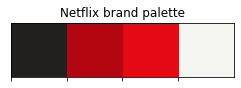

In [10]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette")
plt.show()

### Content Distribution

In [11]:
ratio = df['type'].value_counts()
ratio

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [12]:
percentage = ratio / len(df['type']) * 100
round(percentage)

Movie      70.0
TV Show    30.0
Name: type, dtype: float64

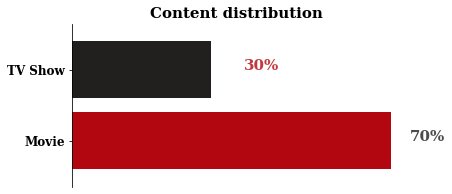

In [13]:
plt.figure(figsize=(6, 3))
cc = ['#b20710','#221f1f']
ratio.plot(kind='barh', color=cc, width = 0.8 ) 
plt.title('Content distribution ',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'})   
plt.text(3300,1, '30%',{'font':'Serif','weight':'bold' ,'size':'15','color':'#b20710'}, alpha = 0.8)
plt.text(6500,0, '70%',{'font':'Serif','weight':'bold' ,'size':'15','color':'#221f1f'}, alpha = 0.8)

plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.xticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(False)

### Country wise content

In [14]:
df['country'] = df['country'].apply(lambda x: x.split(",")[0])
df_country = df.groupby(['country'])['type'].count().sort_values(ascending=False)[:10]

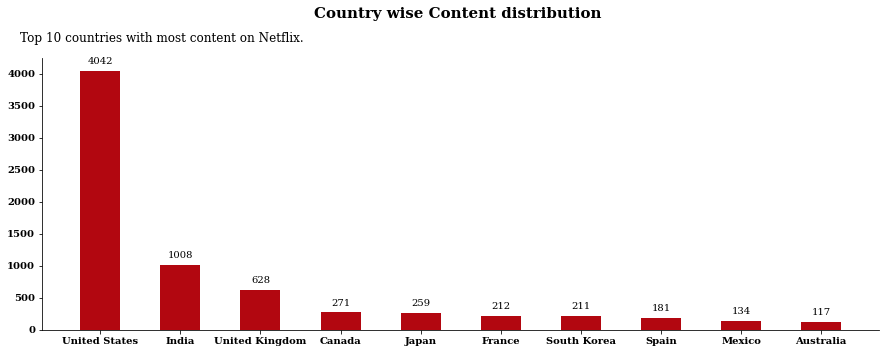

In [15]:
plt.figure(figsize =(15,5))
plt.bar(df_country.index, df_country, width=0.5, color = '#b20710')

#annotations
for i in df_country.index:
    plt.annotate(f"{df_country[i]}", 
                   xy=(i, df_country[i] + 150),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
plt.text(-1, 4500, 'Top 10 countries with most content on Netflix.', fontsize=12, fontweight='light', fontfamily='serif')
plt.title('Country wise Content distribution ',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'}, pad=40)
plt.yticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

The United states is the producer of highest content on Netflix followed by India and UK

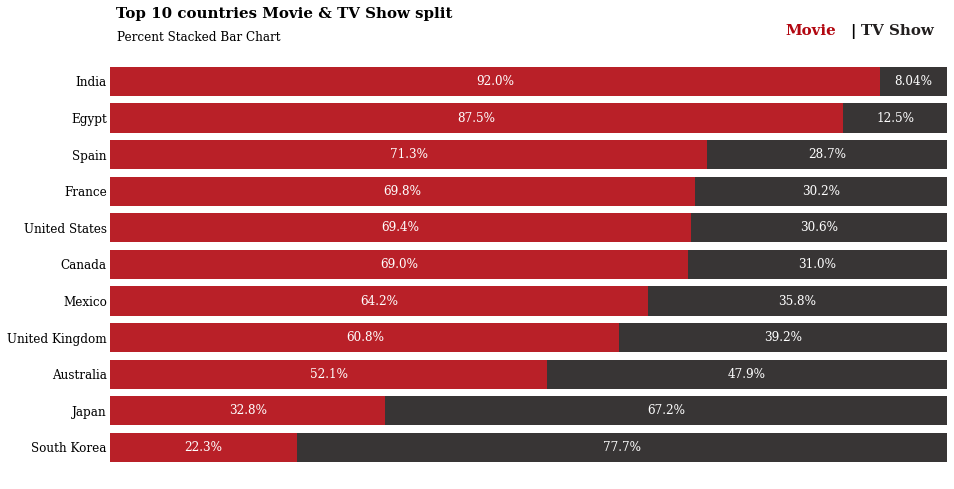

In [213]:
country_order = df['country'].value_counts()[:11].index
data_q2q3 = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Above plot depicts how top content producing countries have Movies and TV show splits.<br>
For instance the Indian content is mostly from Movies potentially due to "Bollywood" while South koreans mostly prefer TV shows

### Audience Analysis

In [16]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'}

df['age_cat'] = df['rating'].replace(rating)
age_cat = df['age_cat'].value_counts()

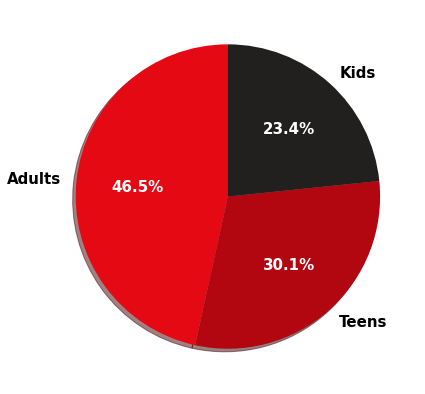

In [92]:
fig, ax = plt.subplots(figsize = (7,7))
patches ,texts, autotexts = ax.pie(age_cat, labels = age_cat.index , colors = ['#e50914', '#b20710','#221f1f'],autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'black', 'shade': 0.9}, startangle = 90)

# Setting bold font for labels
for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(15)

# Setting white color for autopct text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(15)

plt.show()

Netflix primary audience is Adults as expected with nearly half of the content is for adults.

### Rating Analysis

In [19]:
rate = df['rating'].value_counts()

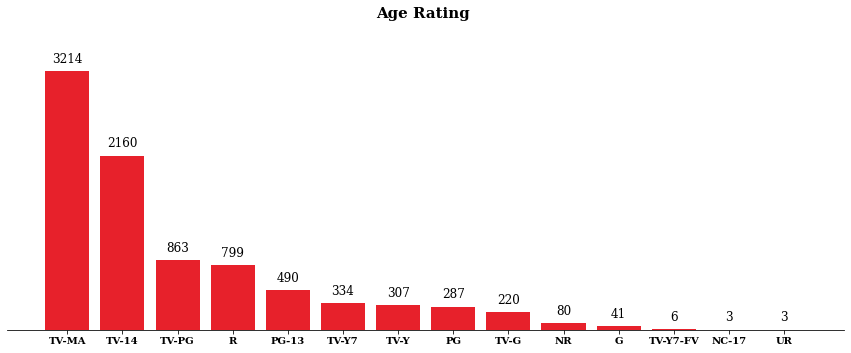

In [214]:
plt.figure(figsize =(15,5))
plt.bar(rate.index, rate, width=0.8, color = ['#e50914'],alpha = 0.9)
#annotations
for i in rate.index:
    plt.annotate(f"{rate[i]}", 
                   xy=(i, rate[i] + 150),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize = 12)
plt.title('Age Rating ',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'}, pad=40)
plt.yticks([])
plt.xticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

Shows Adult for TV Shows have most content

In [21]:
# rating analysis by TV or movies
rrate = df.groupby(['type'])['rating'].value_counts()

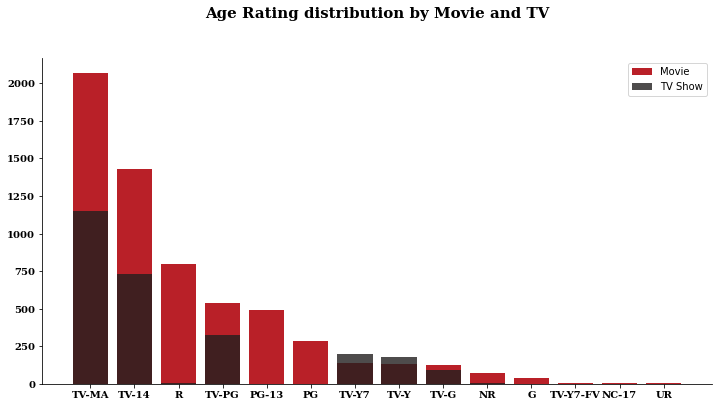

In [94]:
movie = rrate.loc['Movie']
tv = rrate.loc['TV Show']

#plot
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.8, color='#b20710', alpha=0.9, label='Movie')
ax.bar(tv.index, tv, width=0.8, color='#221f1f', alpha=0.8, label='TV Show')

plt.title('Age Rating distribution by Movie and TV',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'}, pad=40)
plt.yticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=10, fontweight='bold', fontfamily='serif')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
ax.legend()

### Content Analysis

In [23]:
content = df.groupby(['type','year_added'])['year_added'].count()

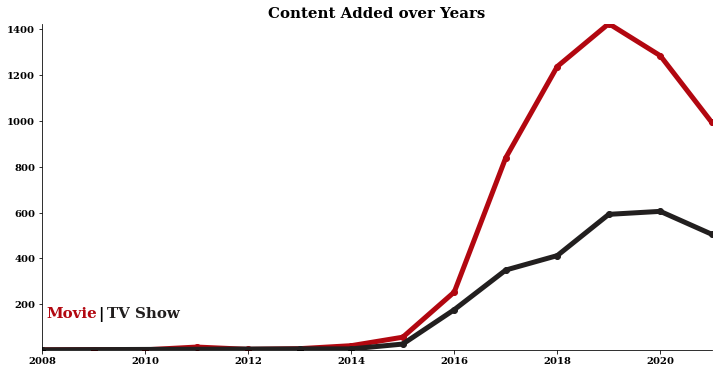

In [83]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.plot(content['Movie'].index, content['Movie'].values,color='#b20710',label= 'Movie',linewidth = 5, marker = 'o' )
#ax.fill_between(content['Movie'].index,0, content['Movie'].values, color='#b20710', alpha=0.9)
ax.plot(content['TV Show'].index, content['TV Show'].values,color='#221f1f', label = 'TV',linewidth = 5, marker = 'o')
#ax.fill_between(content['TV Show'].index,0, content['TV Show'].values, color='#221f1f', alpha=0.9)
plt.title('Content Added over Years',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'})

plt.xticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
#ax.grid(axis='y')
#ax.yaxis.tick_right()
plt.yticks(fontsize=10, fontweight='bold', fontfamily='serif')
fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
ax.margins(x=0, y=0)
plt.show()

The addition of content on netflix saw a step increase during 2016-2018 probably due to global inception of netflix around the time, But saw decrease around 2020 potentially due to Covid.

In [75]:
added_month = df.groupby(['month_added'])['type'].count().reset_index()
label_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
added_month['month'] = added_month.month_added.map(label_map)

<function matplotlib.pyplot.show(close=None, block=None)>

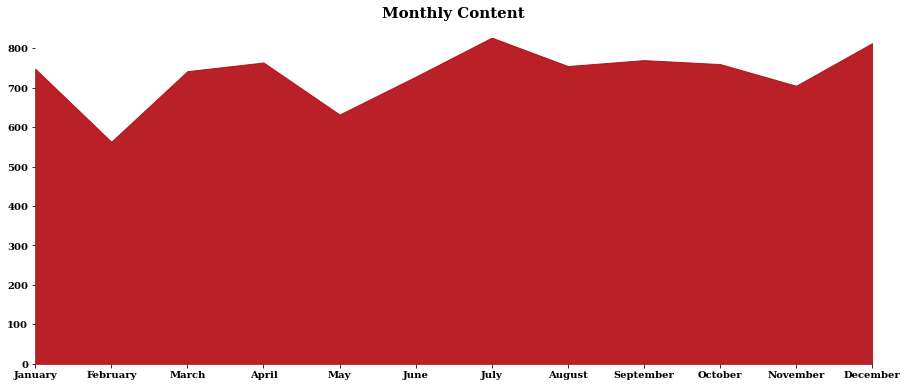

In [95]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
#ax.plot(added_month.month, added_month.type, linewidth=4, color='#b20710')
ax.fill_between(added_month.month,0, added_month.type, color='#b20710',alpha = 0.9)
plt.title('Monthly Content',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'},pad=20)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(fontsize=10, fontweight='bold', fontfamily='serif')
plt.xticks( fontsize=10, fontweight='bold', fontfamily='serif')
ax.margins(x=0, y=0)
plt.show

Most Content on netflix is added in the month of December and July!!

### Oldest Movies/ TV shows on Netflix

In [139]:
small = df.sort_values("release_year", ascending = True)
small[['type','title', "release_year"]][:15].style.set_table_styles(
    [{'selector': 'th',
      'props': [('border', '1px solid black'), ('background-color', '#b20710'), ('color', 'white'),('font-weight','bold'),('text-align', 'center')]},
     {'selector': 'td',
      'props': [('border', '1px solid black'),('background-color', '#221f1f'),('color', 'white'),('font-family', 'Serif'),('font-weight','bold')]}
    ], overwrite=False).hide_index()

type,title,release_year
TV Show,Pioneers: First Women Filmmakers*,1925
Movie,Prelude to War,1942
Movie,The Battle of Midway,1942
Movie,Undercover: How to Operate Behind Enemy Lines,1943
Movie,Why We Fight: The Battle of Russia,1943
Movie,WWII: Report from the Aleutians,1943
Movie,Tunisian Victory,1944
Movie,The Negro Soldier,1944
Movie,The Memphis Belle: A Story of a Flying Fortress,1944
Movie,San Pietro,1945


### Directors and Actors

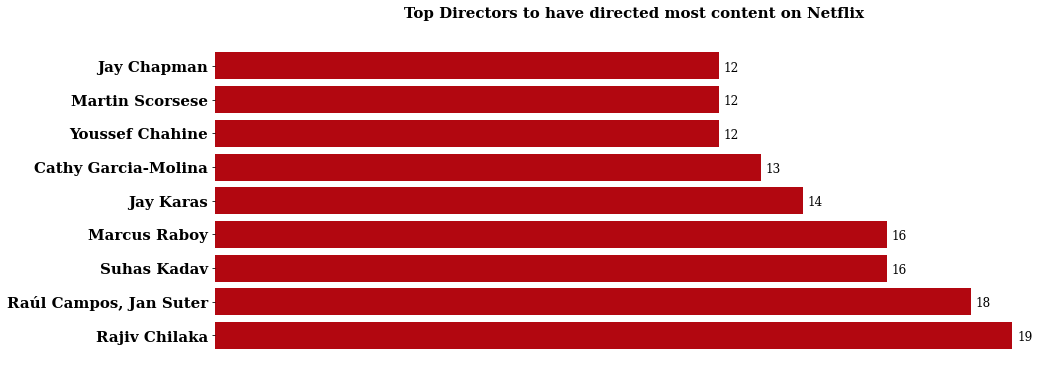

In [248]:
director = df['director'].value_counts().sort_values(ascending = False)[1:10]

fig, ax = plt.subplots(1,1, figsize=(15, 6))
plt.barh(director.index, director,color = '#b20710')
plt.title('Top Directors to have directed most content on Netflix',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'black'},pad=20)
plt.yticks(fontsize=15, fontweight='bold', fontfamily='serif')
plt.xticks( [])

for i in director.index:
    plt.annotate(f"{director[i]}", 
                   xy=(director[i] , i),xytext=(20, 0),textcoords="offset points",
                   va = 'center_baseline', ha='right',fontweight='light', fontfamily='serif', fontsize = 12)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

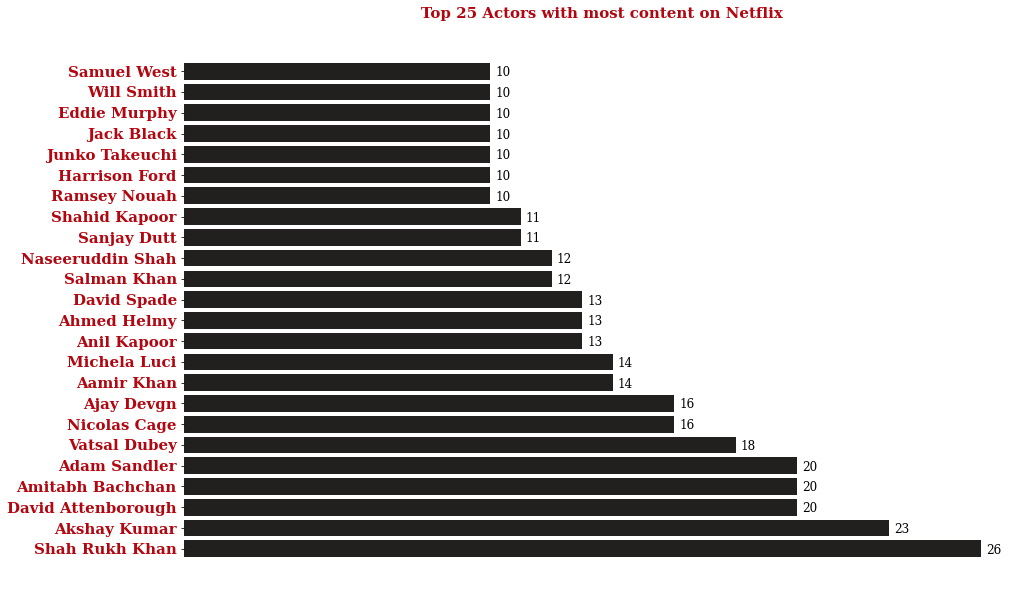

In [258]:
Actor = df['cast'].apply(lambda x: x.split(",")[0]).value_counts().sort_values(ascending = False)[1:25]

#plot
fig, ax = plt.subplots(1,1, figsize=(15, 10))
plt.barh(Actor.index, Actor,color = '#221f1f')

plt.title('Top 25 Actors with most content on Netflix',{'font': 'Serif', 'Size': '15','weight':'bold', 'color':'#b20710'},pad=20)
plt.yticks(fontsize=15, fontweight='bold', fontfamily='serif',color='#b20710')
plt.xticks( [])

for i in Actor.index:
    plt.annotate(f"{Actor[i]}", 
                   xy=(Actor[i] , i),xytext=(20, 0),textcoords="offset points",
                   va = 'center_baseline', ha='right',fontweight='light', fontfamily='serif', fontsize = 12)
    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

In [254]:
# Additional Info
df.cast.value_counts()[:20]

NoDataAvailable                                                                                                           825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
David Spade, London Hughes, Fortune Feimster                                                                                6
Kevin Hart                                                                                                            

Interestingly most Indian actors like Shah Rukh Khan, Akshay Kumar, Amitabh Bachchan, Ajay devgn, Aamir Khan are in the list with most netflix shows/movies.

### Categories

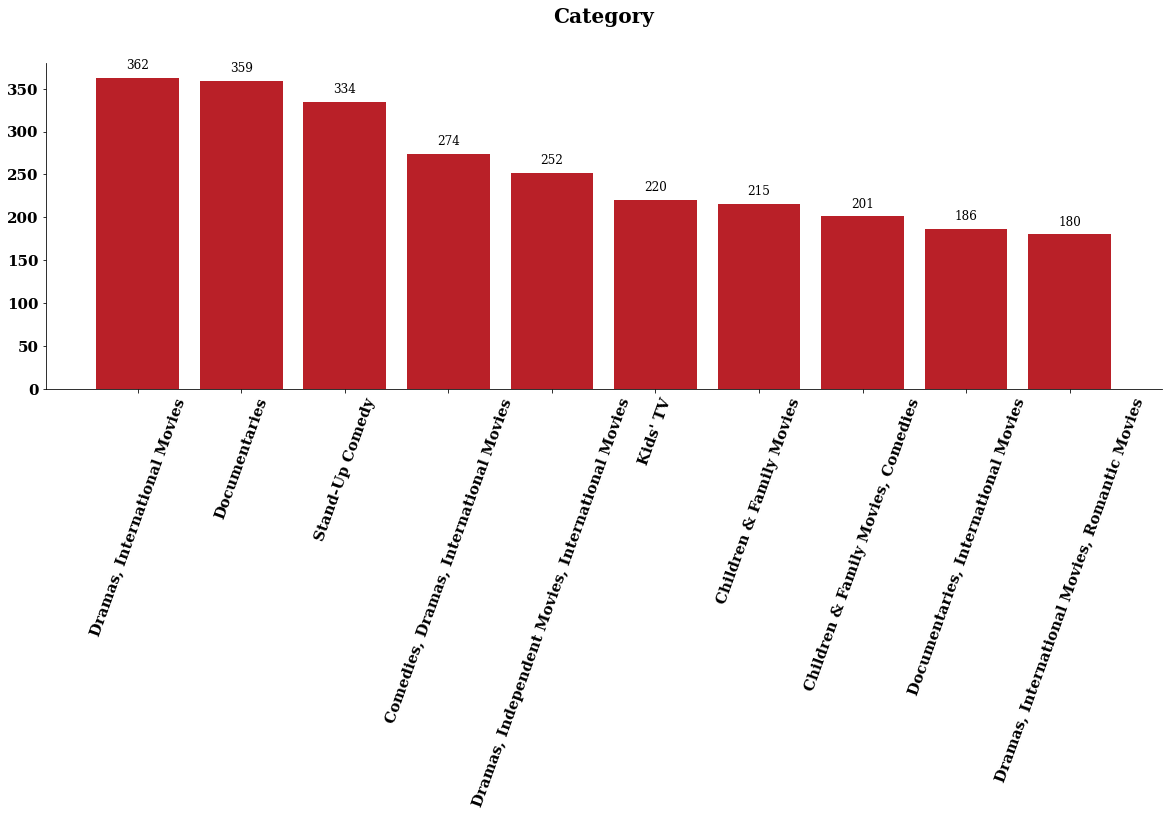

In [247]:
listed = df['listed_in'].value_counts()[:10]

#plot
plt.figure(figsize =(20,6))
plt.bar(listed.index, listed, width=0.8, color = ['#b20710'],alpha = 0.9)

#annotations
for i in listed.index:
    plt.annotate(f"{listed[i]}", 
                   xy=(i, listed[i] + 15),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', fontsize = 12)

plt.title('Category',{'font': 'Serif', 'Size': '20','weight':'bold', 'color':'black'}, pad=40)
plt.xticks(fontsize=15, fontweight='bold', fontfamily='serif', rotation = 70)
plt.yticks(fontsize=15, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.show()